# Simulate the CT scan

In [1]:
import os
from gvxrPython3 import gvxr
# from gvxrPython3 import json2gvxr
# from gvxrPython3.JSON2gVXRDataReader import *
import json2gvxr
from JSON2gVXRDataReader import *

import SimpleITK as sitk

from cil.utilities.display import show_geometry
from cil.processors import TransmissionAbsorptionConverter
from cil.recon import FDK, FBP
from cil.utilities.jupyter import islicer

spekpy is not install, you won't be able to load a beam spectrum using spekpy
SimpleGVXR 2.0.7 (2023-11-06T20:19:42) [Compiler: Microsoft Visual Studio] on Windows
gVirtualXRay core library (gvxr) 2.0.7 (2023-11-06T20:19:41) [Compiler: Microsoft Visual Studio] on Windows


In [2]:
current_folder = str(globals()['_dh'][0])
data_path = "25OctoberData/"
JSON_fname = current_folder + "/" + data_path + "/simulation.json"

In [3]:
# Create an OpenGL context
# MS Windows
if os.name == "nt":
    json2gvxr.initGVXR(JSON_fname, "OPENGL")
# MacOS
elif str(os.uname()).find("Darwin") >= 0:
    json2gvxr.initGVXR(JSON_fname, "OPENGL")
else:
    json2gvxr.initGVXR(JSON_fname, "EGL")

Create an OpenGL context: 800x600


In [4]:
json2gvxr.initDetector(JSON_fname)
json2gvxr.initSourceGeometry()
json2gvxr.initSpectrum()
json2gvxr.initSamples()

Set up the detector
	Detector position: [166.92100705616795, 5.539214960161393, 610.6291569055294, 'mm']
	Detector up vector: [0.0, -1.0, 0.0]
	Number of pixels: [640, 480]
	Detector number of pixels: [640, 480]
	Pixel spacing: [0.22999999523162842, 0.2300000031789144, 'mm']
Set up the beam
	Source position: [-67.29211150858809, 181.75211882974276, -255.81059181375286, 'mm']
	Source shape: PointSource


In [5]:
json2gvxr.initScan()

Set up the CT Scan


In [6]:
reader = JSON2gVXRDataReader(file_name=JSON_fname)
data = reader.read(verbose=1)

Detecotr size: [147.1999969482422, 110.4000015258789, 'mm'] mm
Source position: [-67.29211151 181.75211883 255.81059181] mm
Detector position: [ 166.92100706    5.53921496 -610.62915691] mm
Ray direction: [ 0.25606245 -0.1926515  -0.9472684 ]
Rotation axis: [-0.  1.  0.]
Rotation axis position: [-39.44720026 136.78691029 -79.01517603] mm
Angles: [  0.    3.6   7.2  10.8  14.4  18.   21.6  25.2  28.8  32.4  36.   39.6
  43.2  46.8  50.4  54.   57.6  61.2  64.8  68.4  72.   75.6  79.2  82.8
  86.4  90.   93.6  97.2 100.8 104.4 108.  111.6 115.2 118.8 122.4 126.
 129.6 133.2 136.8 140.4 144.  147.6 151.2 154.8 158.4 162.  165.6 169.2
 172.8 176.4 180.  183.6 187.2 190.8 194.4 198.  201.6 205.2 208.8 212.4
 216.  219.6 223.2 226.8 230.4 234.  237.6 241.2 244.8 248.4 252.  255.6
 259.2 262.8 266.4 270.  273.6 277.2 280.8 284.4 288.  291.6 295.2 298.8
 302.4 306.  309.6 313.2 316.8 320.4 324.  327.6 331.2 334.8 338.4 342.
 345.6 349.2 352.8 356.4 360. ] degrees
distance: 63.572509163541724
[

In [7]:
print(data.geometry)

3D Cone-beam tomography
System configuration:
	Source position: [-67.29211151, 181.75211883, 255.81059181]
	Rotation axis position: [-39.44720026, 136.78691029, -79.01517603]
	Rotation axis direction: [-0.,  1.,  0.]
	Detector position: [ 166.92100706,    5.53921496, -610.62915691]
	Detector direction x: [0.96535211, 0.        , 0.26095078]
	Detector direction y: [-0.,  1.,  0.]
Panel configuration:
	Number of pixels: [640 480]
	Pixel size: [0.23 0.23]
	Pixel origin: bottom-left
Channel configuration:
	Number of channels: 1
Acquisition description:
	Number of positions: 101
	Angles 0-20 in degrees:
[ 0. ,  3.6,  7.2, 10.8, 14.4, 18. , 21.6, 25.2, 28.8, 32.4, 36. , 39.6,
 43.2, 46.8, 50.4, 54. , 57.6, 61.2, 64.8, 68.4]
Distances in units: mm


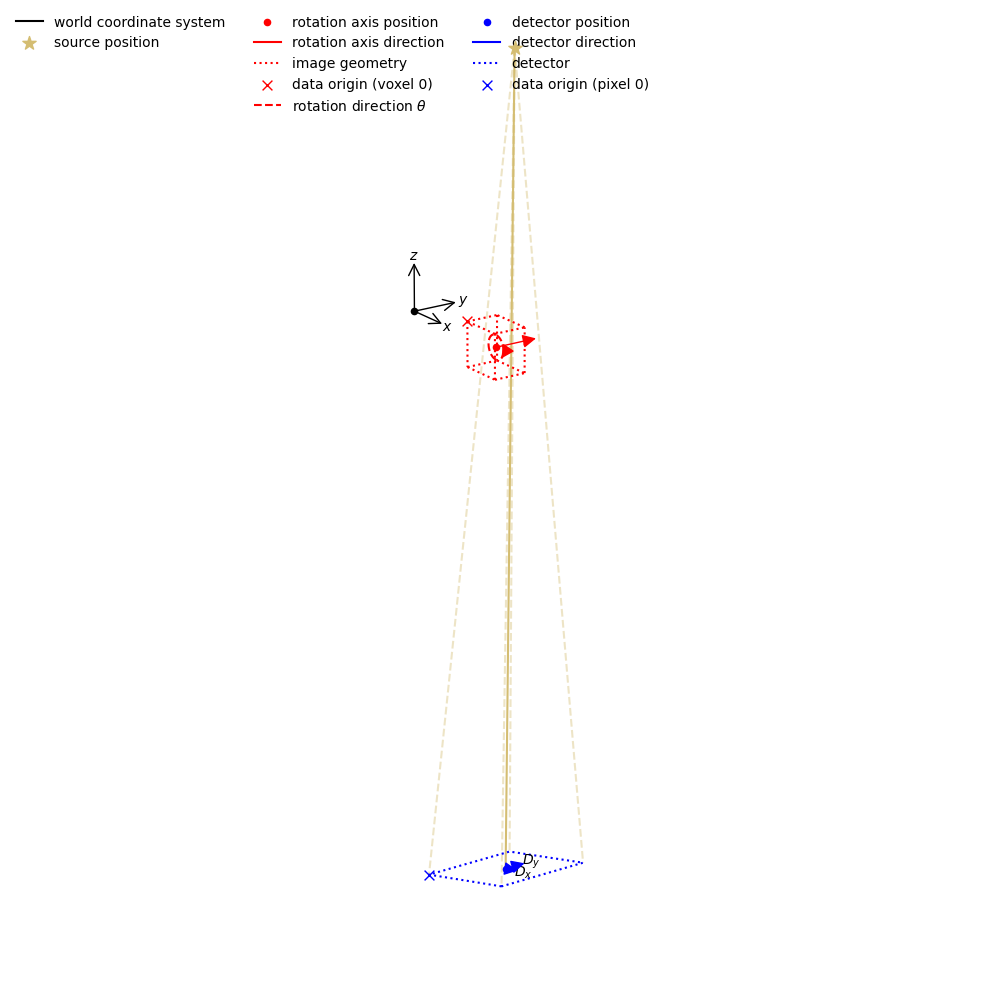

In [8]:
show_geometry(data.geometry)

In [9]:
data.reorder(order='tigre')
data_corr = TransmissionAbsorptionConverter(white_level=data.max())(data)

In [10]:
ig = data.geometry.get_ImageGeometry()

recons = FDK(data_corr, ig).run()
# recons = FBP(data_corr, ig).run()

FDK recon

Input Data:
	angle: 101
	vertical: 480
	horizontal: 640

Reconstruction Volume:
	vertical: 480
	horizontal_y: 640
	horizontal_x: 640

Reconstruction Options:
	Backend: tigre
	Filter: ram-lak
	Filter cut-off frequency: 1.0
	FFT order: 11
	Filter_inplace: False



In [11]:
islicer(recons, direction='vertical')

In [12]:
islicer(recons, direction='horizontal_x')